## 1) Import Libraries


In [1]:
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.cluster import KMeans
import  seaborn as sns
import datasist as ds
from scipy.stats import stats
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")
import requests
from math import floor
from termcolor import colored as cl

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

## 2) load data

In [2]:
df = pd.read_csv('../data/all_stocks_5yr.csv')
df.columns=['date_time', 'open', 'high', 'low', 'close', 'volume','name']
df.drop('name',inplace=True,axis=1)
df=df[df['volume']!=0] #discard volume zero data points
df.date_time = pd.to_datetime(df['date_time'])
# df.reset_index(drop=True, inplace=True)
# df = df.set_index(['date_time'])
df.isna().sum()
df.tail() # printing tail just to check how many rows are present

,date_time,open,high,low,close,volume
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912


In [3]:
df.describe()

,open,high,low,close,volume
count,619029.00,619032.00,619032.00,619036.00,619036.00
mean,83.02,83.78,82.26,83.04,4321851.32
std,97.38,98.21,96.51,97.39,8693630.66
min,1.62,1.69,1.50,1.59,3.00
25%,40.22,40.62,39.83,40.24,1070350.00
50%,62.59,63.15,62.02,62.62,2082119.00
75%,94.37,95.18,93.54,94.41,4284520.50
max,2044.00,2067.99,2035.11,2049.00,618237630.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619036 entries, 0 to 619039
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  619036 non-null  datetime64[ns]
 1   open       619029 non-null  float64       
 2   high       619032 non-null  float64       
 3   low        619032 non-null  float64       
 4   close      619036 non-null  float64       
 5   volume     619036 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 33.1 MB


## 3) Missing values

In [5]:
df.isnull().sum()

date_time    0
open         7
high         4
low          4
close        0
volume       0
dtype: int64

In [6]:
df.dropna(inplace=True)

## 4) Duplicated values

In [7]:
df.duplicated().sum() # no duplicates

0

In [8]:
df.drop_duplicates(inplace=True)

## 5) Outliers

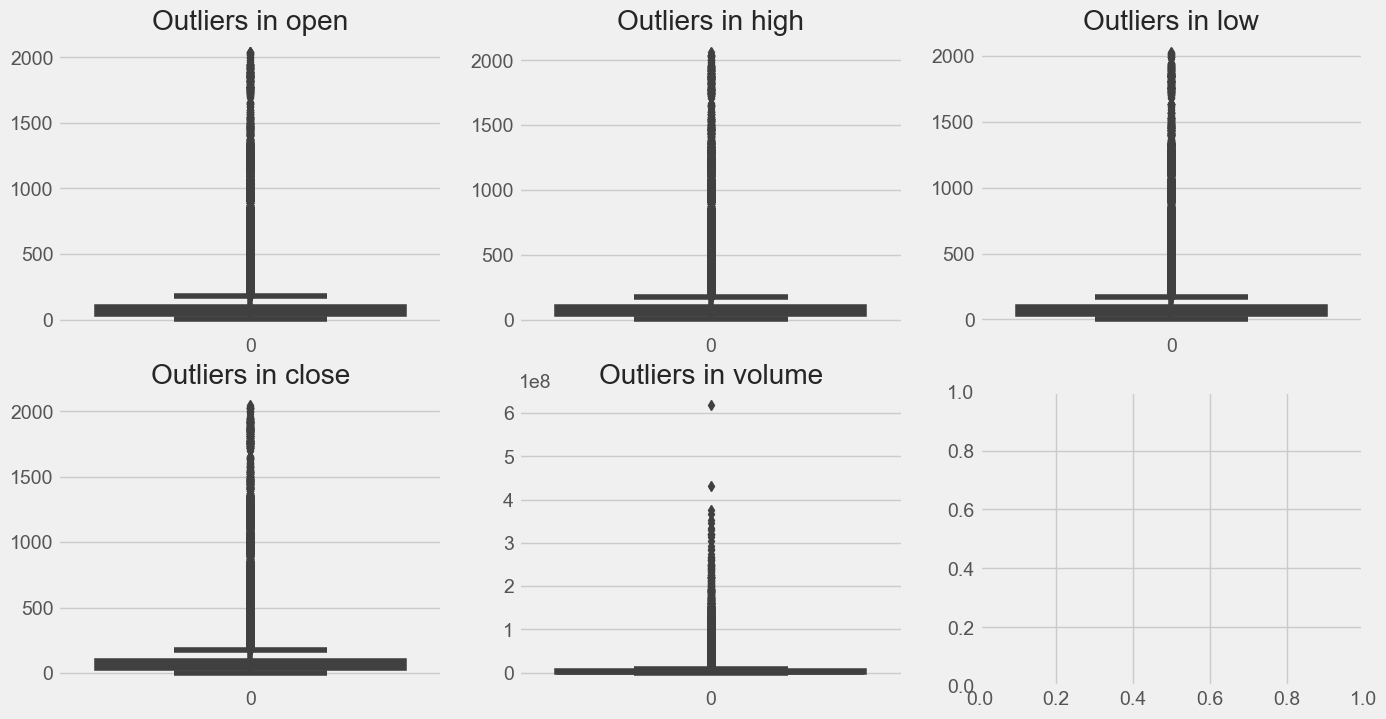

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with 3 columns and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Creating a counter to keep track of the current subplot
counter = 0

# Iterating through all columns of the dataframe
for column in df.columns:
    if column == 'date_time':
        continue
    # Create a box plot for each column
    ax = axes[counter // 3, counter % 3]
    sns.boxplot(df[column], ax=ax)
    ax.set_title(f"Outliers in {column}")
    counter += 1

# Showing the plot
plt.show()

In [10]:
df = df.set_index(['date_time'])

## IQR method
The IQR method, also known as the Tukey method, is a method for identifying outliers in a dataset. It is based on the interquartile range, which is the difference between the 75th and 25th percentiles of the dataset. Data points that are outside of the range of 1.5IQR to 3IQR are considered outliers.

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
df

,open,high,low,close,volume
date_time,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-22,13.57,13.60,13.21,13.57,6071400
2013-02-25,13.60,13.76,13.00,13.02,7186400
...,...,...,...,...,...
2018-02-01,76.84,78.27,76.69,77.82,2982259
2018-02-02,77.53,78.12,76.73,76.78,2595187
2018-02-05,76.64,76.92,73.18,73.83,2962031


##  z-score method
The z-score method is a statistical method for identifying outliers in a dataset. It calculates the difference between each data point and the mean of the dataset, in terms of the standard deviation of the dataset. Data points that have a z-score greater than a certain threshold (typically 3 or -3) are considered outliers.

In [13]:
# calculating the z-scores of the dataset
z_scores = np.abs(stats.zscore(df))

# seting a threshold for identifying outliers
threshold = 3

# identifing the outliers in the dataset
outliers = np.where(z_scores > threshold)

# removing the outliers from the dataset
df = df[(z_scores < threshold).all(axis=1)]

In [14]:
df.reset_index(inplace=True)

In [15]:
df

,date_time,open,high,low,close,volume
0,2013-02-08,15.07,15.12,14.63,14.75,8407500
1,2013-02-12,14.45,14.51,14.10,14.27,8126000
2,2013-02-22,13.57,13.60,13.21,13.57,6071400
3,2013-02-25,13.60,13.76,13.00,13.02,7186400
4,2013-02-27,13.28,13.62,13.18,13.41,7390500
...,...,...,...,...,...,...
514597,2018-02-01,76.84,78.27,76.69,77.82,2982259
514598,2018-02-02,77.53,78.12,76.73,76.78,2595187
514599,2018-02-05,76.64,76.92,73.18,73.83,2962031
514600,2018-02-06,72.74,74.56,72.13,73.27,4924323


In [16]:
dfpl = df.copy()

In [17]:
dfpl.reset_index(inplace=True)

In [18]:
# dfpl.reset_index(drop=True, inplace=True)
# dfpl = dfpl.set_index(['date_time'])
dfpl.drop('index' ,inplace = True , axis= 1 )

In [19]:
dfpl

,date_time,open,high,low,close,volume
0,2013-02-08,15.07,15.12,14.63,14.75,8407500
1,2013-02-12,14.45,14.51,14.10,14.27,8126000
2,2013-02-22,13.57,13.60,13.21,13.57,6071400
3,2013-02-25,13.60,13.76,13.00,13.02,7186400
4,2013-02-27,13.28,13.62,13.18,13.41,7390500
...,...,...,...,...,...,...
514597,2018-02-01,76.84,78.27,76.69,77.82,2982259
514598,2018-02-02,77.53,78.12,76.73,76.78,2595187
514599,2018-02-05,76.64,76.92,73.18,73.83,2962031
514600,2018-02-06,72.74,74.56,72.13,73.27,4924323


#  Correlation

The correlation matrix is a square matrix where the diagonal elements are always 1 (because a variable is perfectly correlated with itself) and the off-diagonal elements are between -1 and 1. Positive values indicate a positive correlation, meaning that as one variable increases, the other variable also increases. Negative values indicate a negative correlation, meaning that as one variable increases, the other variable decreases. The closer the correlation coefficient is to 1 or -1, the stronger the correlation.


<Axes: >

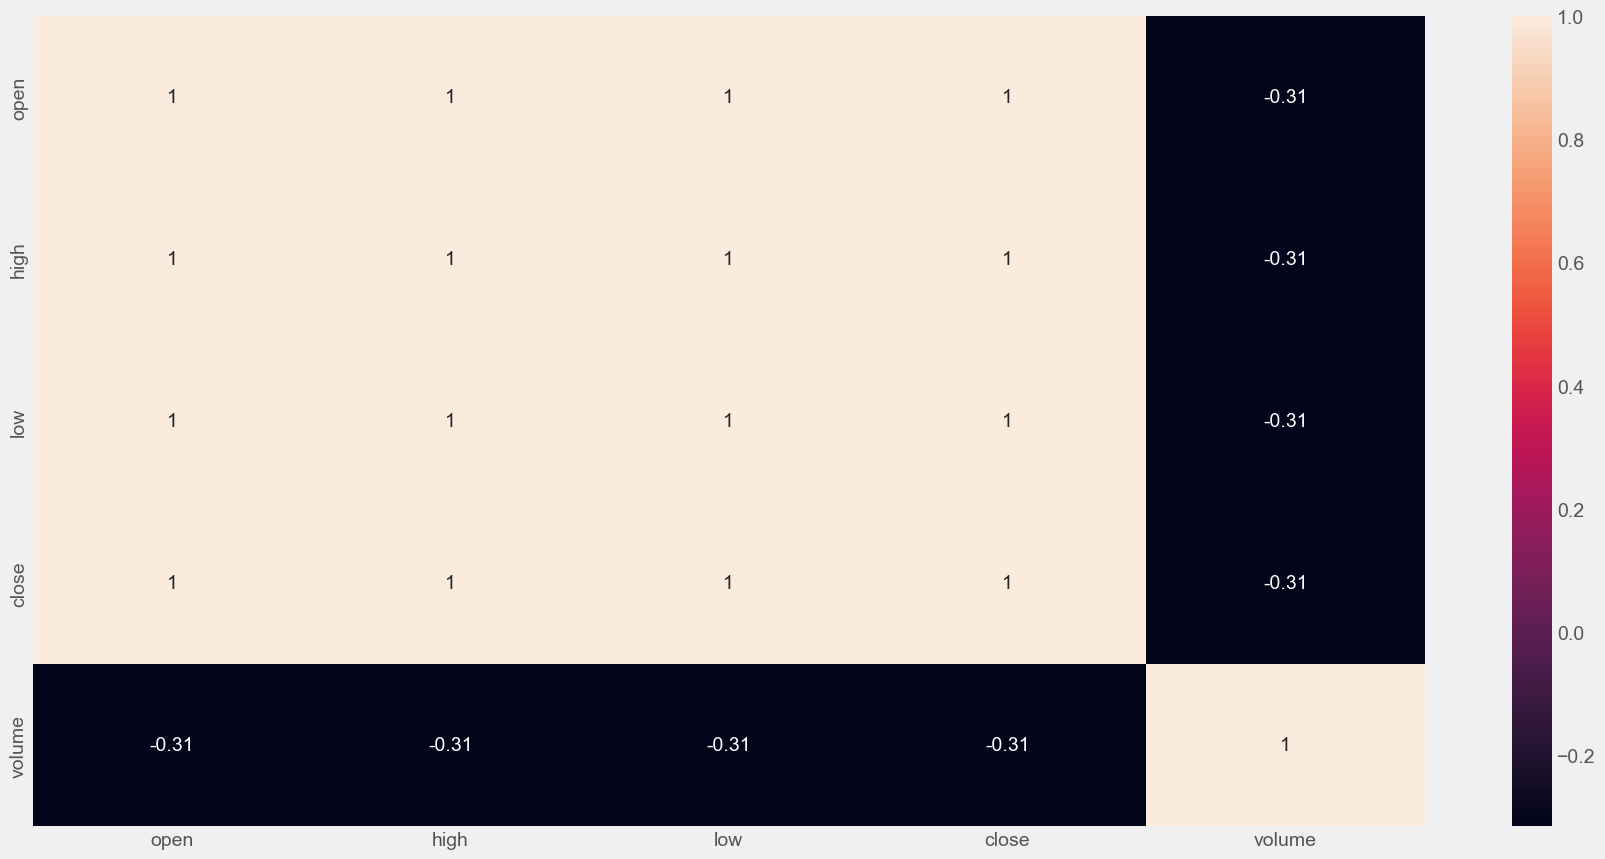

In [20]:
import seaborn as sns
corr = df.corr()

sns.heatmap(corr, annot=True)

## Visualize Data for a Short Horizon


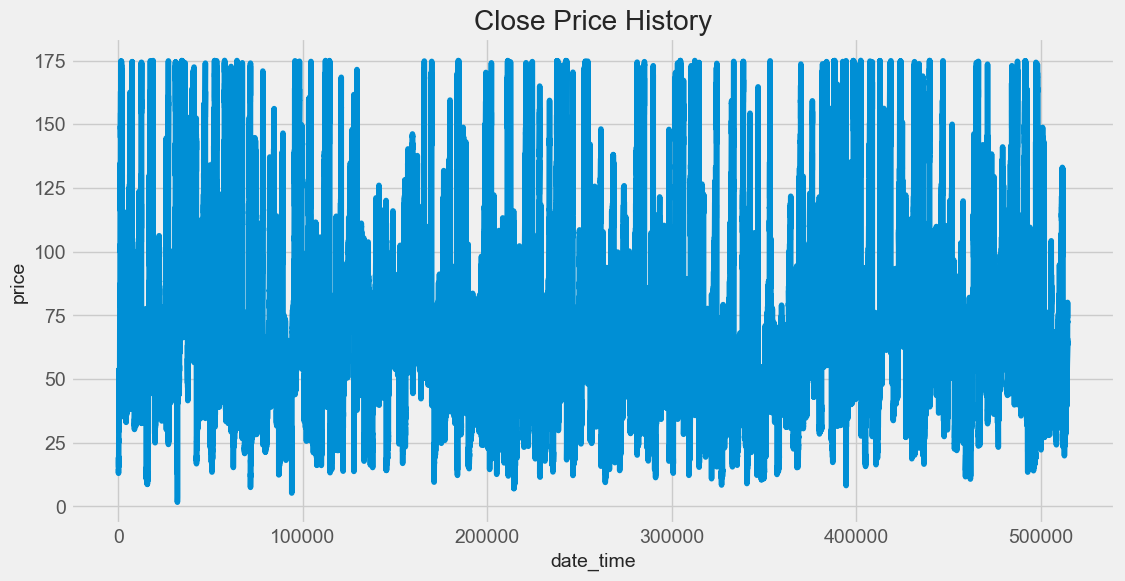

In [21]:
dfpl = df #choosing a slice of 100 datapoints
plt.figure(figsize=(12, 6))
plt.plot(dfpl['close'], label='close')
plt.title('Close Price History')
plt.xlabel('date_time')
plt.ylabel('price')
plt.show()

## Calculate the MACD and Signal lines

For divergence calculation, taking a long horizon is better . Hence choosing the slice of dataframe having 600 datapoints

In [22]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    for i in frames:
        i.reset_index(inplace=True, drop=True)
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

macd = get_macd(df['close'], 26, 12, 9).reset_index()
dfpl =  pd.concat([df, macd], axis=1)

## Hence choosing the slice of dataframe having 600 datapoints

In [23]:
dfpl
# dfpl.reset_index(drop=True, inplace=True)
# dfpl = dfpl.set_index(['date_time'])

,date_time,open,high,low,close,volume,index,macd,signal,hist
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,0,0.00,0.00,0.00
1,2013-02-12,14.45,14.51,14.10,14.27,8126000,1,-0.04,-0.01,-0.03
2,2013-02-22,13.57,13.60,13.21,13.57,6071400,2,-0.12,-0.03,-0.09
3,2013-02-25,13.60,13.76,13.00,13.02,7186400,3,-0.23,-0.07,-0.16
4,2013-02-27,13.28,13.62,13.18,13.41,7390500,4,-0.28,-0.11,-0.17
...,...,...,...,...,...,...,...,...,...,...
514597,2018-02-01,76.84,78.27,76.69,77.82,2982259,514597,1.53,1.60,-0.06
514598,2018-02-02,77.53,78.12,76.73,76.78,2595187,514598,1.36,1.55,-0.19
514599,2018-02-05,76.64,76.92,73.18,73.83,2962031,514599,0.98,1.43,-0.46
514600,2018-02-06,72.74,74.56,72.13,73.27,4924323,514600,0.62,1.27,-0.65


In [24]:
macd = get_macd(dfpl['close'], 26, 12, 9)
# def plot_macd(prices, macd, signal, hist):
#     ax1 = plt.subplot2grid((9,1), (0,0), rowspan = 5, colspan = 1)
#     ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
#
#     ax1.plot(prices)
#     ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
#     ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')
#
#     for i in range(len(prices)):
#         if str(hist[i])[0] == '-':
#             ax2.bar(prices.index[i], hist[i], color = '#ef5350')
#         else:
#             ax2.bar(prices.index[i], hist[i], color = '#26a69a')
#
#     plt.legend(loc = 'lower right')
#
# plot_macd(dfpl['close'], macd['macd'], macd['signal'], macd['hist'])

In [25]:
def implement_macd_strategy(prices, data):
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)

    return buy_price, sell_price, macd_signal

buy_price, sell_price, macd_signal = implement_macd_strategy(dfpl['close'], macd)

In [26]:
# ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
# ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
#
# ax1.plot(dfpl['close'], color = 'skyblue', linewidth = 2, label = 'stocks')
# ax1.plot(dfpl.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
# ax1.plot(dfpl.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
# ax1.legend()
# ax1.set_title(' MACD SIGNALS')
# ax2.plot(macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
# ax2.plot(macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')
#
# for i in range(len(macd)):
#     if str(macd['hist'][i])[0] == '-':
#         ax2.bar(macd.index[i], macd['hist'][i], color = '#ef5350')
#     else:
#         ax2.bar(macd.index[i], macd['hist'][i], color = '#26a69a')
#
# plt.legend(loc = 'lower right')
# plt.show()

In [27]:
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)

for i in range(len(dfpl['close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]

macd2 = macd['macd']
signal = macd['signal']
close_price = dfpl['close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(dfpl.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(dfpl.index)

frames = [close_price, macd2, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,close,macd,signal,macd_signal,macd_position
0,14.75,0.00,0.00,0,1
1,14.27,-0.04,-0.01,-1,0
2,13.57,-0.12,-0.03,0,0
3,13.02,-0.23,-0.07,0,0
4,13.41,-0.28,-0.11,0,0
...,...,...,...,...,...
514597,77.82,1.53,1.60,-1,0
514598,76.78,1.36,1.55,0,0
514599,73.83,0.98,1.43,0,0
514600,73.27,0.62,1.27,0,0


In [28]:
horizontal_concat_df = pd.concat([dfpl,strategy.drop('close' ,axis = 1 )], axis=1)

In [29]:
horizontal_concat_df['macd_position'].value_counts()

1    263065
0    251537
Name: macd_position, dtype: int64

In [30]:
ret = pd.DataFrame(np.diff(dfpl['close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

for i in range(len(ret)):
    try:
        returns = ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass

macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/dfpl['close'][0])
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the MACD strategy by investing $100k in stocks : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in stocks : 6162185.57
Profit percentage of the MACD strategy : 6162%


In [34]:
df['macd_investment_ret'] = macd_strategy_ret_df['macd_returns']

In [35]:
horizontal_concat_df.to_csv("final.csv",index = False)

In [33]:
macd_strategy_ret_df

,macd_returns
0,-0.48
1,-0.00
2,-0.00
3,0.00
4,0.00
...,...
514596,1.09
514597,-0.00
514598,-0.00
514599,-0.00


I am normalizing the 'close' and 'volume' columns by using standardization method, which makes the values of these columns have a mean of 0 and a standard deviation of 1. This makes data more comparable and consistent, which can help improve the accuracy and reliability of my analysis.


In [ ]:
# #normalizing the close and volume columns
# df['close'] = (df['close'] - df['close'].mean()) / df['close'].std()
# df['volume'] = (df['volume'] - df['volume'].mean()) / df['volume'].std()